In [21]:
defect_word = ["fix", "bug", "error", "issue"]
defect_commits = []
with open('git_log_output.txt', encoding='utf-8') as infile:
        for line in infile:
            line_lst = line.split()
            for l in line_lst:
                if l in defect_word:
                    defect_commits.append(line)
print(defect_commits)

['Mon Nov 10 22:36:21 2025 +0800 - automan: fix qwen2vl/qwen3vl video processor temporal padding when num_frames%temporal_patch_size!=1 (#42083)\n', 'Mon Nov 10 14:48:25 2025 +0100 - Gorka Bengochea: 📝 docs(smolvlm): fix variable name in batch inference example (#42123)\n', 'Mon Nov 10 05:03:52 2025 -0800 - Yao Matrix: fix continuous batching issues, extend ut cases to xpu (#41830)\n', 'Mon Nov 10 17:06:06 2025 +0800 - JJJYmmm: [Bugfix] fix qwen3vl expand generation with video (#42089)\n', 'Fri Nov 7 10:37:26 2025 +0100 - Pauline Bailly-Masson: permissions worflows fix (#42080)\n', 'Thu Nov 6 19:50:59 2025 +0100 - Pauline Bailly-Masson: Fix security issue 5 (#42072)\n', 'Thu Nov 6 07:38:58 2025 -0800 - Yao Matrix: fix tensor device placement issue of 2 UT cases (#41921)\n', 'Thu Nov 6 07:38:58 2025 -0800 - Yao Matrix: fix tensor device placement issue of 2 UT cases (#41921)\n', 'Thu Nov 6 09:57:17 2025 +0100 - Manuel de Prada Corral: Annoying typo in attention error message (#42037)\n'

In [22]:
month = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
    "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

defect_per_month = {}

for c in defect_commits:
    parts = c.split()
    if len(parts) >= 5:
        mon = parts[1]
        year = parts[4]
        if mon in month:
            key = f"{month[mon]}/{year}"
            defect_per_month[key] = defect_per_month.get(key, 0) + 1

for k, v in defect_per_month.items():
    print(f"{k}: {v}")




11/2025: 14
10/2025: 34
09/2025: 27
08/2025: 42
07/2025: 59
06/2025: 43
05/2025: 38
04/2025: 55
03/2025: 44
02/2025: 34
01/2025: 30
12/2024: 20
11/2024: 20
10/2024: 41
09/2024: 32
08/2024: 24
07/2024: 18
06/2024: 27
05/2024: 23
04/2024: 30
03/2024: 31
02/2024: 18
01/2024: 19
12/2023: 29
11/2023: 22
10/2023: 30
09/2023: 30
08/2023: 37
07/2023: 20
06/2023: 34
05/2023: 38
04/2023: 28
03/2023: 63
02/2023: 31
01/2023: 30


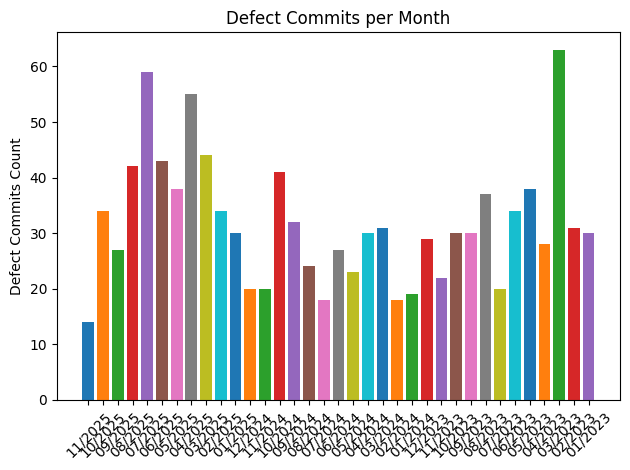

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

month = list(defect_per_month.keys())
counts = list(defect_per_month.values())

bar_labels = ["November", "December", "January", "February", "March", "April",
              "May", "June", "July", "August", "September", "October"]

# generate colors using a colormap
cmap = plt.get_cmap('tab10')   # or 'viridis', 'Set3', etc.
bar_colors = [cmap(i % 10) for i in range(len(month))]

ax.bar(month, counts, color=bar_colors)

ax.set_ylabel('Defect Commits Count')
ax.set_title('Defect Commits per Month')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In october they released a minor update. And they didnt release a patch until novemeber. The october update was mainy models, and only one new feature which they said its "stable". So probably this update didn't introduce many new bugs.

In [24]:
with open('git_log_output.txt', encoding='utf-8') as infile:
    for line in infile:
        print(line.split("/n"))

['Tue Nov 11 17:54:33 2025 +0800 - Qile Xu: fix: improve video processing fps assignment logic (#42009)\n']
['src/transformers/models/qwen2_5_vl/modular_qwen2_5_vl.py\n']
['src/transformers/models/qwen2_5_vl/processing_qwen2_5_vl.py\n']
['src/transformers/video_utils.py\n']
['\n']
['Tue Nov 11 09:23:58 2025 +0100 - Arthur: update deps table (#42120)\n']
['setup.py\n']
['src/transformers/dependency_versions_table.py\n']
['\n']
['Mon Nov 10 22:25:57 2025 +0530 - Yaswanth Gali: Remove unused functions in `image_transforms.py` (#42044)\n']
['src/transformers/image_transforms.py\n']
['\n']
['Mon Nov 10 11:48:10 2025 -0500 - Yoni Gozlan: Fix MaskFormer/Mask2Former fast image processors (#41393)\n']
['src/transformers/image_transforms.py\n']
['src/transformers/models/mask2former/image_processing_mask2former_fast.py\n']
['src/transformers/models/maskformer/image_processing_maskformer_fast.py\n']
['tests/models/mask2former/test_image_processing_mask2former.py\n']
['tests/models/maskformer/test_

In [58]:
def parse_git_log(filepath): 
    commit_dict = {}
    month = {
        "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
        "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
    }
    current_commit = None

    with open(filepath, encoding='utf-8') as infile:
        for line in infile:
            line = line.strip()
            if not line:
                continue
            if line[:3] in ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]:
                current_commit = line
                commit_dict[current_commit] = []
            elif current_commit:
                commit_dict[current_commit].append(line)
    
    defect_words = ["fix", "bug", "error", "issue"]
    defect_files = {}
    for commit, files in commit_dict.items():
        if any(word in commit.lower() for word in defect_words):
            defect_files[commit] = files

    defect_files_count = {}
    for files in defect_files.values():
        for f in files:
            defect_files_count[f] = defect_files_count.get(f, 0) + 1

    if defect_files_count:
        sorted_files = sorted(defect_files_count.items(), key=lambda x: x[1], reverse=True)
        top_1_file_name = sorted_files[0][0]
        top_2_file_name = sorted_files[1][0]

        print(f"Top 1 defect file: {top_1_file_name} ({sorted_files[0][1]} commits)")
        print(f"Top 2 defect file: {top_2_file_name} ({sorted_files[1][1]} commits)")

        lst_file_1 = [] 
        lst_file_2 = []

        for commit, files in commit_dict.items():
            if top_1_file_name in files:
                parts = commit.split()
                if len(parts) >= 5:
                    mon = parts[1]
                    year = parts[4]
                    if mon in month:
                        key = f"{month[mon]}/{year}"
                        defect_per_month[key] = defect_per_month.get(key, 0) + 1

                for k, v in defect_per_month.items():
                    lst_file_1.append((k, v))

        for commit, files in commit_dict.items():
            if top_2_file_name in files:
                parts = commit.split()
                if len(parts) >= 5:
                    mon = parts[1]
                    year = parts[4]
                    if mon in month:
                        key = f"{month[mon]}/{year}"
                        defect_per_month[key] = defect_per_month.get(key, 0) + 1

                for k, v in defect_per_month.items():
                    lst_file_2.append((k, v))
        return lst_file_1, lst_file_2


parse_git_log("git_log_output.txt")


Top 1 defect file: src/transformers/modeling_utils.py (198 commits)
Top 2 defect file: src/transformers/trainer.py (184 commits)


([('11/2025', 19),
  ('10/2025', 150),
  ('09/2025', 117),
  ('08/2025', 114),
  ('07/2025', 153),
  ('06/2025', 109),
  ('05/2025', 116),
  ('04/2025', 167),
  ('03/2025', 162),
  ('02/2025', 98),
  ('01/2025', 76),
  ('12/2024', 62),
  ('11/2024', 72),
  ('10/2024', 107),
  ('09/2024', 74),
  ('08/2024', 66),
  ('07/2024', 66),
  ('06/2024', 55),
  ('05/2024', 67),
  ('04/2024', 86),
  ('03/2024', 105),
  ('02/2024', 64),
  ('01/2024', 81),
  ('12/2023', 97),
  ('11/2023', 66),
  ('10/2023', 96),
  ('09/2023', 88),
  ('08/2023', 119),
  ('07/2023', 68),
  ('06/2023', 118),
  ('05/2023', 100),
  ('04/2023', 72),
  ('03/2023', 123),
  ('02/2023', 77),
  ('01/2023', 52),
  ('11/2025', 20),
  ('10/2025', 150),
  ('09/2025', 117),
  ('08/2025', 114),
  ('07/2025', 153),
  ('06/2025', 109),
  ('05/2025', 116),
  ('04/2025', 167),
  ('03/2025', 162),
  ('02/2025', 98),
  ('01/2025', 76),
  ('12/2024', 62),
  ('11/2024', 72),
  ('10/2024', 107),
  ('09/2024', 74),
  ('08/2024', 66),
  ('07/2

Top 1 defect file: src/transformers/modeling_utils.py (198 commits)
Top 2 defect file: src/transformers/trainer.py (184 commits)


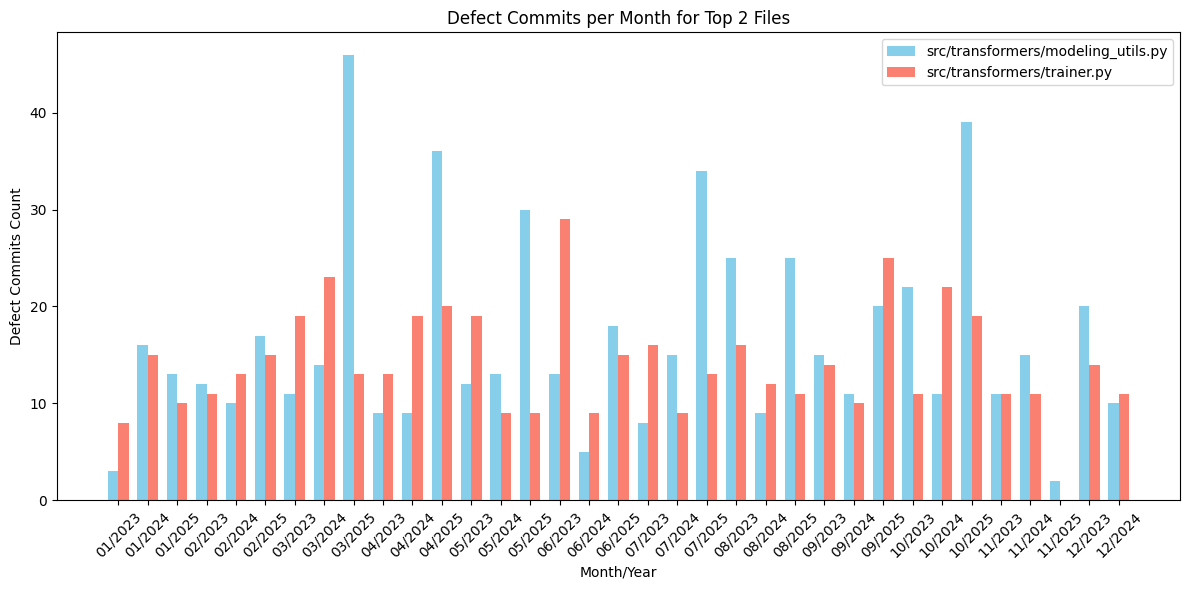

In [59]:
import matplotlib.pyplot as plt

def parse_git_log(filepath): 
    commit_dict = {}
    month_map = {
        "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06",
        "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
    }
    current_commit = None

    with open(filepath, encoding='utf-8') as infile:
        for line in infile:
            line = line.strip()
            if not line:
                continue
            if line[:3] in ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]:
                current_commit = line
                commit_dict[current_commit] = []
            elif current_commit:
                commit_dict[current_commit].append(line)
    
    defect_words = ["fix", "bug", "error", "issue"]
    defect_files = {}
    for commit, files in commit_dict.items():
        if any(word in commit.lower() for word in defect_words):
            defect_files[commit] = files

    defect_files_count = {}
    for files in defect_files.values():
        for f in files:
            defect_files_count[f] = defect_files_count.get(f, 0) + 1

    if defect_files_count:
        sorted_files = sorted(defect_files_count.items(), key=lambda x: x[1], reverse=True)
        top_1_file_name = sorted_files[0][0]
        top_2_file_name = sorted_files[1][0]

        print(f"Top 1 defect file: {top_1_file_name} ({sorted_files[0][1]} commits)")
        print(f"Top 2 defect file: {top_2_file_name} ({sorted_files[1][1]} commits)")

        # Initialize monthly counts for each file
        defect_per_month_1 = {}
        defect_per_month_2 = {}

        for commit, files in commit_dict.items():
            parts = commit.split()
            if len(parts) >= 5:
                mon = parts[1]
                year = parts[4]
                if mon in month_map:
                    key = f"{month_map[mon]}/{year}"

                    if top_1_file_name in files:
                        defect_per_month_1[key] = defect_per_month_1.get(key, 0) + 1
                    if top_2_file_name in files:
                        defect_per_month_2[key] = defect_per_month_2.get(key, 0) + 1

        # Sort months
        all_months = sorted(set(list(defect_per_month_1.keys()) + list(defect_per_month_2.keys())))
        counts_1 = [defect_per_month_1.get(m, 0) for m in all_months]
        counts_2 = [defect_per_month_2.get(m, 0) for m in all_months]

        return all_months, counts_1, counts_2, top_1_file_name, top_2_file_name

# --- Parse log and get data ---
months, counts1, counts2, file1, file2 = parse_git_log("git_log_output.txt")

# --- Plot barchart ---
import numpy as np

x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width/2, counts1, width, label=file1, color='skyblue')
ax.bar(x + width/2, counts2, width, label=file2, color='salmon')

ax.set_ylabel('Defect Commits Count')
ax.set_xlabel('Month/Year')
ax.set_title('Defect Commits per Month for Top 2 Files')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


